In [2]:
import numpy as np
import pandas as pd
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import sklearn
from sklearn import preprocessing
%matplotlib inline

pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows', 100)

In [3]:
data = pd.read_csv("C:/Users/benja/temp/FIFA 19/FIFA19_data.csv")
data.head()
data = data.drop(["Unnamed: 0","Photo","ID","Flag","Club Logo","Jersey Number","Joined", "Loaned From"], axis=1, inplace =False)
data.dropna(subset=['Height'], inplace=True)

In [4]:
data.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


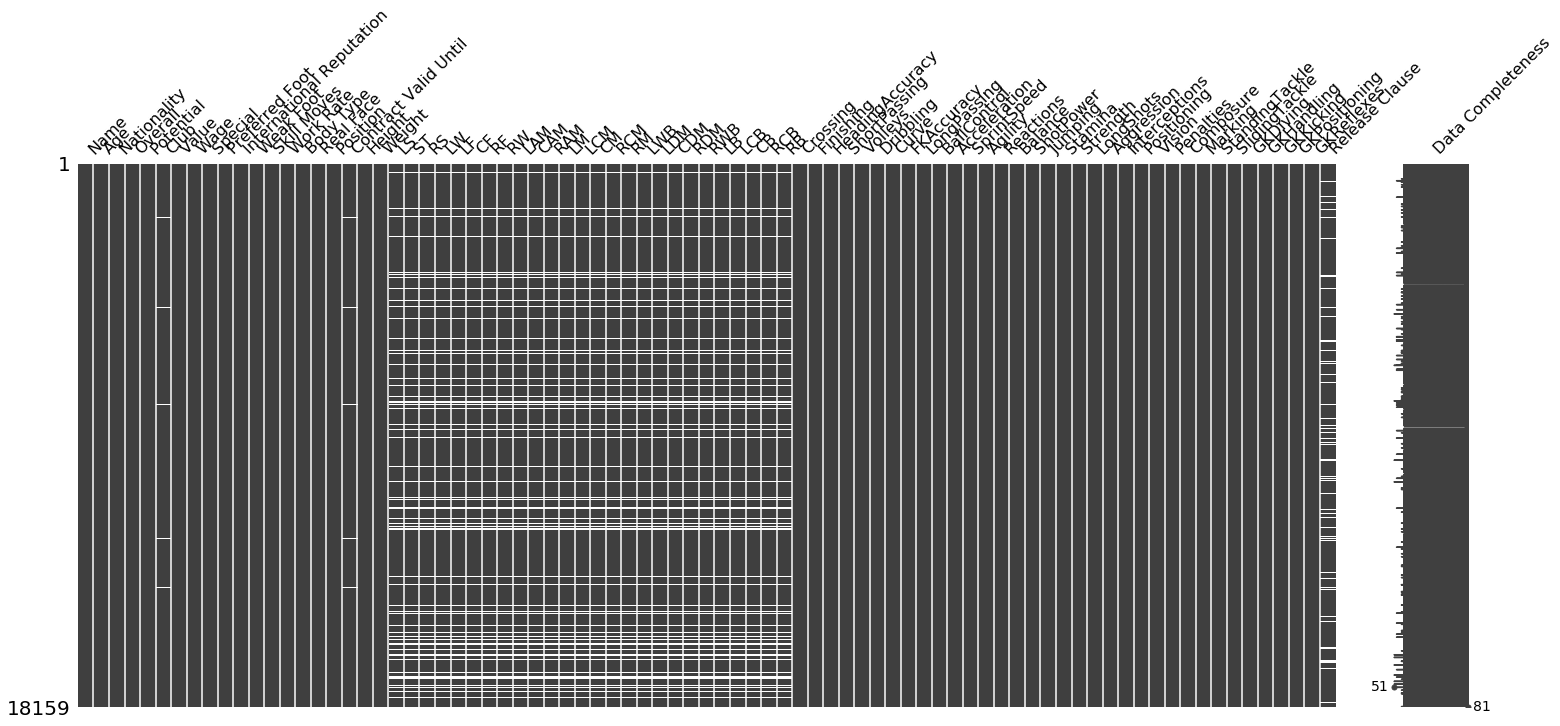

In [5]:
msno.matrix(data, labels="True")

In [6]:
total_num = data.isnull().sum().sort_values(ascending=False)
perc = data.isnull().sum()/data.isnull().count() *100
perc1 = (round(perc,2).sort_values(ascending=False))
#Creating a data frame:
data_null = pd.concat([total_num, perc1], axis =1, keys =["Total Missing Values", "Percentage %"]).sort_values(by="Percentage %", ascending = False)

#Top nulls
top_null = data_null[data_null["Percentage %"]>0]
top_null.reset_index(inplace=True)
top_null.columns = ['index',"Total Missing Values", "Percentage %"]
top_null.head(10)

#replacing missing values
data['Club'] = data['Club'].fillna('No_Club')

In [7]:
# Converting units 
def m_k_to_int(df_value):
    
    try:
        value = float(df_value[1:-1])
        suffix = str(df_value[-1])

        if suffix == 'M':
            value *= 1000000
        elif suffix == 'K':
            value *= 1000
            
    except ValueError:
        value = 0
    return value

def weight_to_int(df_value):
    value = float(df_value[0:2])
    value *= 0.45
    return value


def height_to_int(df_value):
    value = str(df_value)
    split_values = value.split("'")
    feet = float(split_values[0])
    inch = float(split_values[1])
    inch += feet*12
    value = round(inch*2.54, 2)
    return value


    


    

In [8]:
#Work Rate
data['Work Rate'] = data['Work Rate'].astype(str)

split_wr = data['Work Rate'].str.split('/', n=1, expand = True)

#Create attack/defense work rate from Work rate and drop wr
data['Attack_WR'] = split_wr[0]
data['Defense_WR'] = split_wr[1]
data = data.drop('Work Rate', axis = 1)





In [9]:
#convert attack wr to int
#wr_to_int = preprocessing.LabelEncoder() #LabelEncoder(['Low','Medium','High'])
#Attack_WRc = wr_to_int.fit_transform(list(data['Attack_WR']))
#Attack_WRc = pd.DataFrame(Attack_WRc)
#Attack_WRc.columns = ["AttackWR"]
#Attack_WRc.index = data.index
#data = data.join(Attack_WRc)

#Defense_WRc = wr_to_int.fit_transform(list(data['Defense_WR']))
#Defense_WRc = pd.DataFrame(Defense_WRc)
#Defense_WRc.columns = ["DefenseWR"]
#Defense_WRc.index = data.index
#data = data.join(Defense_WRc)
#data = data.drop(['Defense_WR','Attack_WR'], axis =1)

# def wr_to_int(df_value):
#     value = df_value
#     try:
#         if value == 'Medium':
#             value = 2
#         elif value == 'Low':
#             value = 1
#         elif value == 'High'
#             value = 3
#     except ValueError:
#         value = 0
#         return value

x = {'Low':1, 'Medium':2,'High':3}
data = data.replace({'Attack_WR':x})

data['Defense_WR'] = data["Defense_WR"].apply(lambda x: x.strip())
data = data.replace({"Defense_WR":x})

In [10]:
data['Club_Reputation'] =  data['International Reputation'].groupby(data['Club']).transform('mean')


data['Weight'] = data['Weight'].apply(weight_to_int)


data['Wage'] = data['Wage'].apply(m_k_to_int)


data['Release Clause'] = data['Release Clause'].astype(str).apply(m_k_to_int)

data['Value'] = data['Value'].apply(m_k_to_int)

data['Height'] = data['Height'].apply(height_to_int)



In [11]:
data['Preferred Foot'] = data['Preferred Foot'].apply(lambda x: 0 if x == 'Left' else 1)

In [12]:
#keeping only the first values excluding the +x value for all positions
def position_pnts(df_value):
    try:
        value = float(df_value[0:2])
    except ValueError:
        value = 0
        
    return value

for col in data.columns[19:45]:
    data[col] = data[col].astype(str).apply(position_pnts)

In [13]:
data1 = data.copy()
for col in data1.columns:
    if data1[col].dtypes != 'float64':
        data1 = data1.drop(col, axis= 1)

In [14]:
data.Defense_WR[0]

2

In [15]:
data2 = data1.iloc[:,7:33].copy()
data2.head()

,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB
0,88.0,88.0,88.0,92.0,93.0,93.0,93.0,92.0,93.0,93.0,93.0,91.0,84.0,84.0,84.0,91.0,64.0,61.0,61.0,61.0,64.0,59.0,47.0,47.0,47.0,59.0
1,91.0,91.0,91.0,89.0,90.0,90.0,90.0,89.0,88.0,88.0,88.0,88.0,81.0,81.0,81.0,88.0,65.0,61.0,61.0,61.0,65.0,61.0,53.0,53.0,53.0,61.0
2,84.0,84.0,84.0,89.0,89.0,89.0,89.0,89.0,89.0,89.0,89.0,88.0,81.0,81.0,81.0,88.0,65.0,60.0,60.0,60.0,65.0,60.0,47.0,47.0,47.0,60.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,82.0,82.0,82.0,87.0,87.0,87.0,87.0,87.0,88.0,88.0,88.0,88.0,87.0,87.0,87.0,88.0,77.0,77.0,77.0,77.0,77.0,73.0,66.0,66.0,66.0,73.0


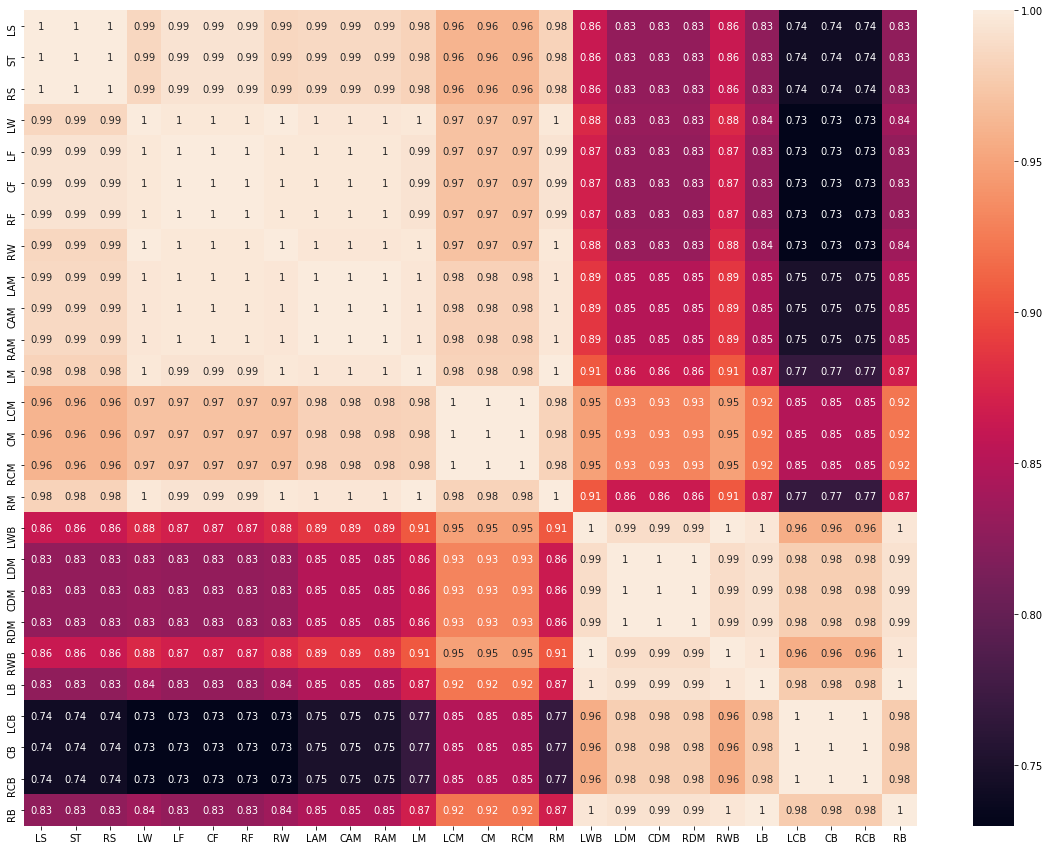

In [16]:
plt.figure(figsize=(20,15))
sns.heatmap(data2.corr(), annot=True)

It seems like positions where the players are playing midfield and above, the positions are highly correlated. And the positions where players are playing defence and below are more correlated.

Perhaps we could group players according to how attacking they are to avoid having to many columns and variables

So we would classify Forwards = LS, ST, RS, LW, LF, CF, RF, RW, Midfielders = LAM, CAM, RAM, LM, LCM, CM, RCM, RM
Def_Midfielders = LDM,CDM,RDM, Defenders = RWB,LB,LCB,CB,RCB,RB

Text(0.5, 0, 'Release Clause')

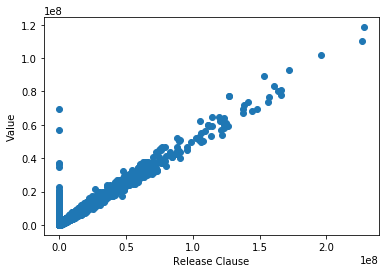

In [17]:
plt.scatter(data['Release Clause'],data['Value'])
plt.ylabel('Value')
plt.xlabel('Release Clause')



In [18]:
data['Potential'] = data['Potential'].fillna('No_Potential')
data.reset_index(inplace=True)
data = data.drop(['index'], axis = 1)

Text(0, 0.5, 'Value')

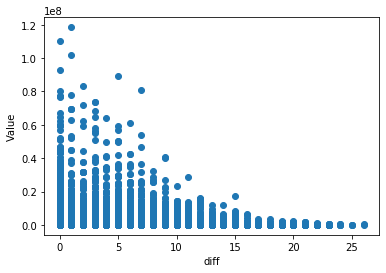

In [19]:
#trying to show correlation between value and potential
data['diff'] = data['Potential'] - data['Overall']
plt.scatter(data['diff'],data['Value'])
plt.xlabel('diff')
plt.ylabel('Value')

There are more values sitting at diff=0 such that there is higher value, this would mean potential has nothing to do with value

In [20]:
data3 = data1.iloc[:,33:67].copy()
data3['Value'] = data['Value']
data3.head()

,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Value
0,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,110500000.0
1,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,77000000.0
2,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,118500000.0
3,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,72000000.0
4,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,102000000.0


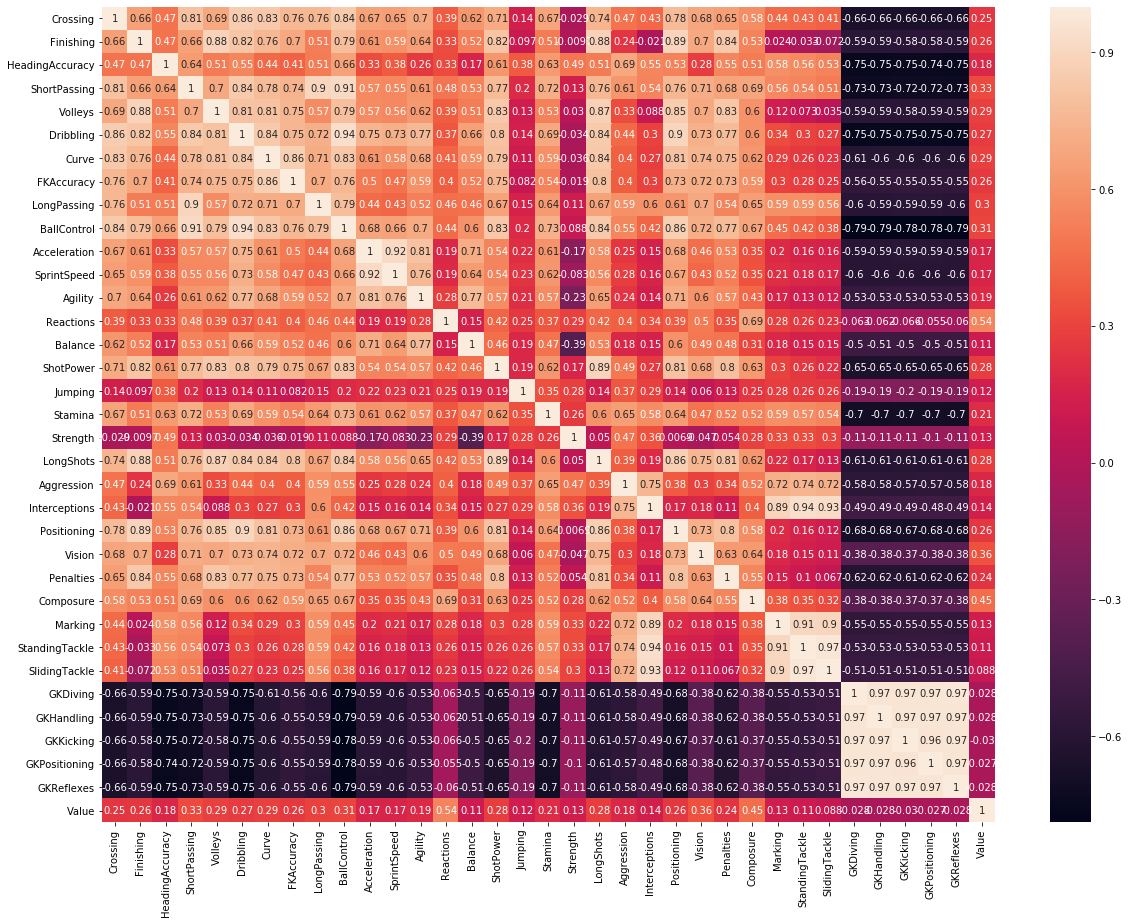

In [21]:
plt.figure(figsize=(20,15))
sns.heatmap(data3.corr(), annot=True)

Looking at this heatmap, obviously stats for goalkeepers are highly correlated so we can separate them for goalkeepers specifically, but stats for Marking, standing tackle, sliding tackle is also highly correlated so we could probably group under a 'defensive stat' the rest by brief observation is more or less independent with each other, even with the players value. So, we can make use of all these variables seperately.

In [22]:
Forward= ['LS','ST','RS','LW','LF','CF','RF','RW']
Midfielder = ['LAM','CAM','RAM','LM','LCM','CM','RCM','RM']
Def_Midfielder = ['LDM','CDM','RDM']
Defenders = ['RWB','LB','LCB','CB','RCB','RB','LWB']
Goalkeepers = ['GK']

Position_Group = ['Forwards','Midfielder','Def_Midfielders','Defenders','Goalkeepers']


        

In [23]:
data['Position_Group'] = data['Position']


In [24]:
def Position_Grouping(df_value):
    value = str(df_value)
    try:
        if value in Forward:
            value = 'Forward'
        elif value in Midfielder:
            value = 'Midfielder'
        elif value in Def_Midfielder:
            value = 'Def_Midfielder'
        elif value in Defenders:
            value = 'Defenders'
        else: 
            value = 'Goalkeepers'
    except ValueError:
        value = 0
        
    return value
data['Position_Group']= data['Position_Group'].apply(Position_Grouping)

In [25]:
with open('data_pickled.pkl', 'wb') as f:
    pickle.dump(data, f)

In [26]:
x=data.groupby(pd.qcut(data['Age'], 5))
pd.DataFrame(x)

,0,1
0,"(15.999, 21.0]",Name Age Nati...
1,"(21.0, 23.0]",Name Age Natio...
2,"(23.0, 26.0]",Name Age National...
3,"(26.0, 29.0]",Name Age Nationali...
4,"(29.0, 45.0]",Name Age Nationa...


In [27]:
age_overall = pd.DataFrame(data.groupby(pd.qcut(data['Age'], 5)).mean()[['Overall', 'Potential','Value']])
age_overall

,Overall,Potential,Value
Age,,,
"(15.999, 21.0]",60.819831,73.236287,1.156757e+06
"(21.0, 23.0]",65.628378,72.698198,2.442153e+06
"(23.0, 26.0]",67.957273,71.197333,3.221356e+06
"(26.0, 29.0]",69.147837,69.534080,3.298095e+06
"(29.0, 45.0]",69.447753,69.448898,2.360594e+06


In [28]:
data['Overall'].mean()

66.24990362905446

In [29]:
data.loc[(data['Release Clause']>5).isnull()]


,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Body Type,Real Face,Position,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Attack_WR,Defense_WR,Club_Reputation,diff,Position_Group


In [30]:
data_null

,Total Missing Values,Percentage %
RWB,2037,11.22
LM,2037,11.22
RCB,2037,11.22
LS,2037,11.22
ST,2037,11.22
RS,2037,11.22
LW,2037,11.22
LF,2037,11.22
CF,2037,11.22
RF,2037,11.22


In [31]:
data[data['Release Clause']== "NaN"]

C:\Users\benja\Anaconda3\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Body Type,Real Face,Position,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Attack_WR,Defense_WR,Club_Reputation,diff,Position_Group


In [32]:
data['Release Clause']>5.isnull()

SyntaxError: invalid syntax (<ipython-input-32-c4412afdad79>, line 1)

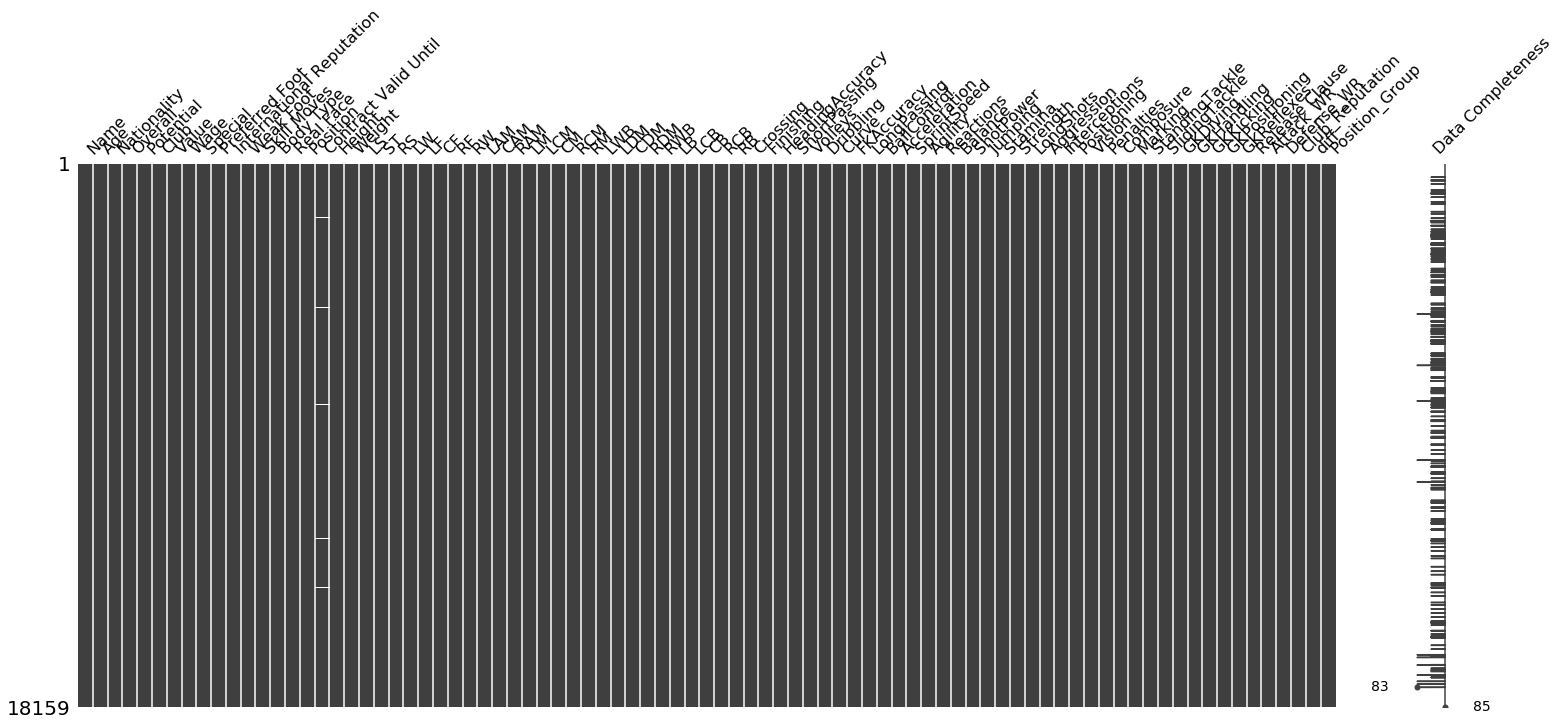

In [33]:
msno.matrix(data, labels=True)